In [356]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv").set_index("customerID")

with open("data/telco-customer-churn-metadata.json") as f:
    meta = json.load(f)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [7]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df[["Partner", "SeniorCitizen", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]] = df[["Partner", "SeniorCitizen", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]].replace({"No":False, "Yes":True, 0:False, 1:True})

C:\Users\admin\AppData\Local\Temp\ipykernel_1536\2305271123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[["Partner", "SeniorCitizen", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]] = df[["Partner", "SeniorCitizen", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]].replace({"No":False, "Yes":True, 0:False, 1:True})


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   bool   
 2   Partner           7043 non-null   bool   
 3   Dependents        7043 non-null   bool   
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   bool   
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   bool   
 16  PaymentMethod     7043 non-null 

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.5,False
3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
7795-CFOCW,Male,False,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
9237-HQITU,Female,False,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


In [12]:
df["TotalCharges"].replace(" ", np.nan, inplace=True)
df["TotalCharges"] = df["TotalCharges"].astype(float)

C:\Users\admin\AppData\Local\Temp\ipykernel_1536\2980536214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].replace(" ", np.nan, inplace=True)


In [13]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

EDA

In [15]:
df["gender"].value_counts(normalize=True)

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

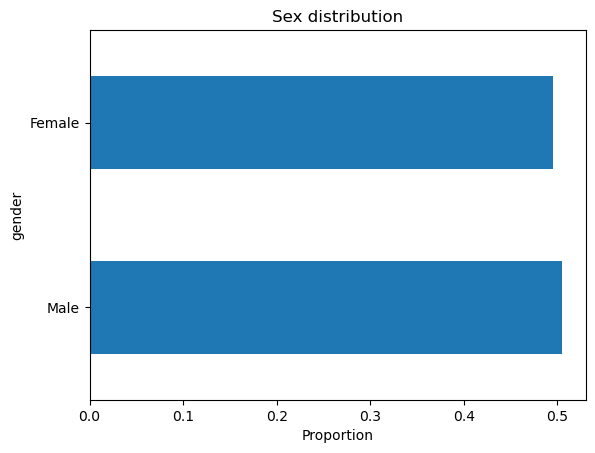

In [16]:
df["gender"].value_counts(normalize=True).plot(kind="barh")
plt.title("Sex distribution")

plt.xlabel("Proportion");

<Axes: ylabel='SeniorCitizen'>

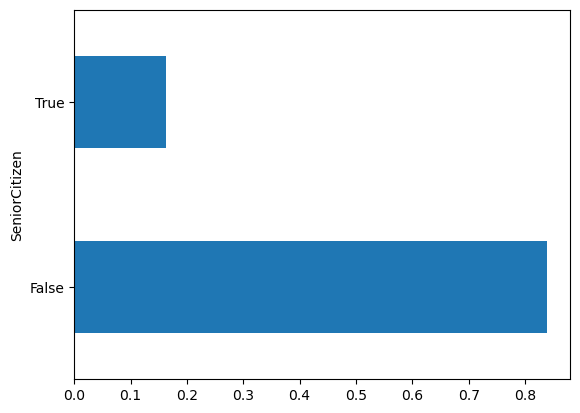

In [17]:
df["SeniorCitizen"].value_counts(normalize=True).plot(kind="barh")

In [18]:
grouped = df.groupby(["gender", "SeniorCitizen"]).size().unstack().reset_index()
grouped

SeniorCitizen,gender,False,True
0,Female,2920,568
1,Male,2981,574


In [19]:
melted = grouped.melt(id_vars="gender", var_name="SeniorCitizen", value_name="count")
melted

,gender,SeniorCitizen,count
0,Female,False,2920
1,Male,False,2981
2,Female,True,568
3,Male,True,574


<Axes: xlabel='SeniorCitizen', ylabel='count'>

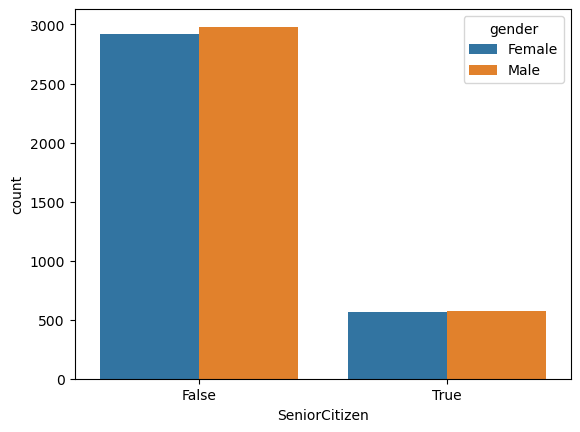

In [20]:
sns.barplot(data=melted, x="SeniorCitizen", y="count", hue="gender")

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
7795-CFOCW,Male,False,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
9237-HQITU,Female,False,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


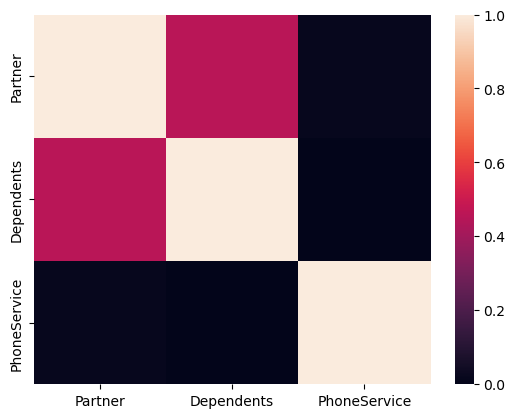

In [22]:
sns.heatmap(data=df[["Partner", "Dependents", "PhoneService"]].corr());

In [23]:
melted = df.groupby(["TechSupport", "Churn"]).size().unstack().reset_index().melt(id_vars="TechSupport", var_name="Churn", value_name="count")

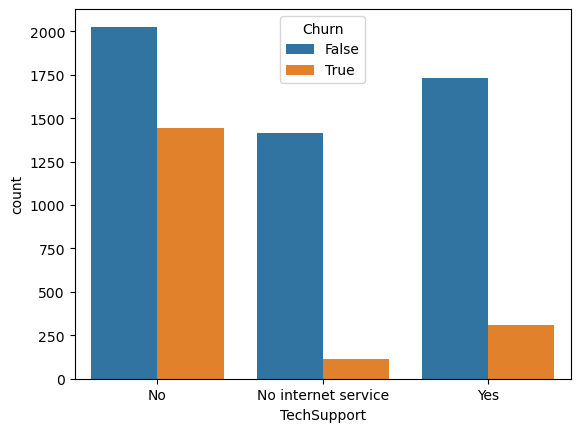

In [24]:
sns.barplot(data=melted, x="TechSupport", y="count", hue="Churn");

In [25]:
gd1 = df.groupby(["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "Churn"]).size().unstack().reset_index()
gd1

Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,False,True
0,No,No,No,No,549,718
1,No,No,No,Yes,167,75
2,No,No,Yes,No,239,207
3,No,No,Yes,Yes,183,57
4,No,Yes,No,No,275,196
5,No,Yes,No,Yes,167,40
6,No,Yes,Yes,No,240,129
7,No,Yes,Yes,Yes,217,39
8,No internet service,No internet service,No internet service,No internet service,1413,113
9,Yes,No,No,No,216,92


In [26]:
melted = gd1.melt(id_vars=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"], var_name="Churn",value_name="count")
melted

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn,count
0,No,No,No,No,False,549
1,No,No,No,Yes,False,167
2,No,No,Yes,No,False,239
3,No,No,Yes,Yes,False,183
4,No,Yes,No,No,False,275
5,No,Yes,No,Yes,False,167
6,No,Yes,Yes,No,False,240
7,No,Yes,Yes,Yes,False,217
8,No internet service,No internet service,No internet service,No internet service,False,1413
9,Yes,No,No,No,False,216


In [27]:
melted["ServicesCombo"] = (
    melted["OnlineSecurity"] + "_" +
    melted["OnlineBackup"] + "_" +
    melted["DeviceProtection"] + "_" +
    melted["TechSupport"]
)
melted

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn,count,ServicesCombo
0,No,No,No,No,False,549,No_No_No_No
1,No,No,No,Yes,False,167,No_No_No_Yes
2,No,No,Yes,No,False,239,No_No_Yes_No
3,No,No,Yes,Yes,False,183,No_No_Yes_Yes
4,No,Yes,No,No,False,275,No_Yes_No_No
5,No,Yes,No,Yes,False,167,No_Yes_No_Yes
6,No,Yes,Yes,No,False,240,No_Yes_Yes_No
7,No,Yes,Yes,Yes,False,217,No_Yes_Yes_Yes
8,No internet service,No internet service,No internet service,No internet service,False,1413,No internet service_No internet service_No int...
9,Yes,No,No,No,False,216,Yes_No_No_No


C:\Users\admin\AppData\Local\Temp\ipykernel_1536\343980401.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


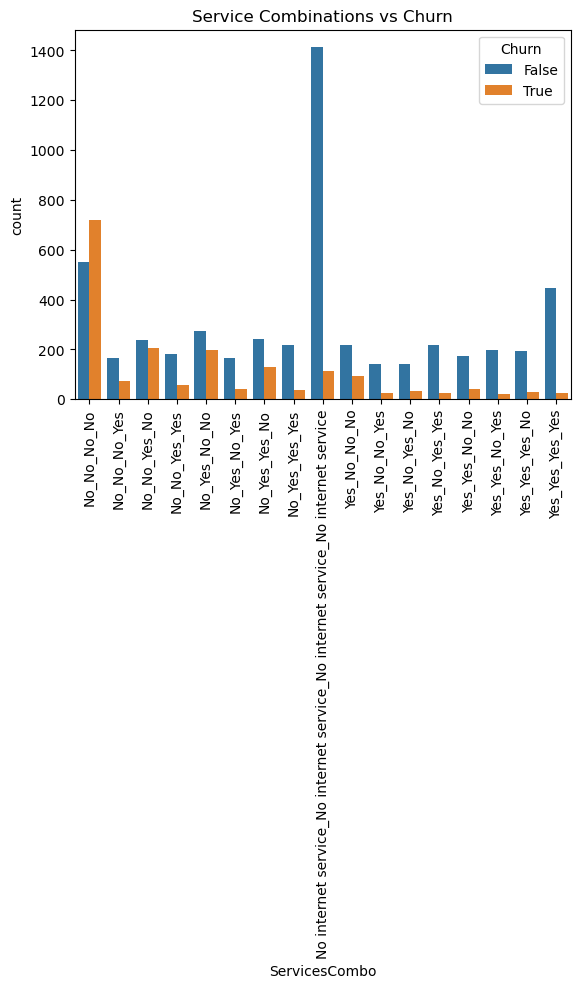

In [28]:
sns.barplot(data=melted, x="ServicesCombo", y="count", hue="Churn")
plt.xticks(rotation=90)
plt.title("Service Combinations vs Churn")
plt.tight_layout()
plt.show()

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
7795-CFOCW,Male,False,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
9237-HQITU,Female,False,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


In [110]:
# SeniorCitizen	
# StreamingTV	
# StreamingMovies
# Contract	
# PaperlessBilling	

melted = df.groupby(["StreamingTV", "StreamingMovies","Churn", "Contract", "PaperlessBilling", "SeniorCitizen"]).size().unstack().reset_index().melt(id_vars=["StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "Churn"], var_name="SeniorCitizen", value_name="count")

In [112]:
melted.head()

,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Churn,SeniorCitizen,count
0,No,No,Month-to-month,False,False,False,327.0
1,No,No,Month-to-month,True,False,False,419.0
2,No,No,One year,False,False,False,125.0
3,No,No,One year,True,False,False,119.0
4,No,No,Two year,False,False,False,93.0


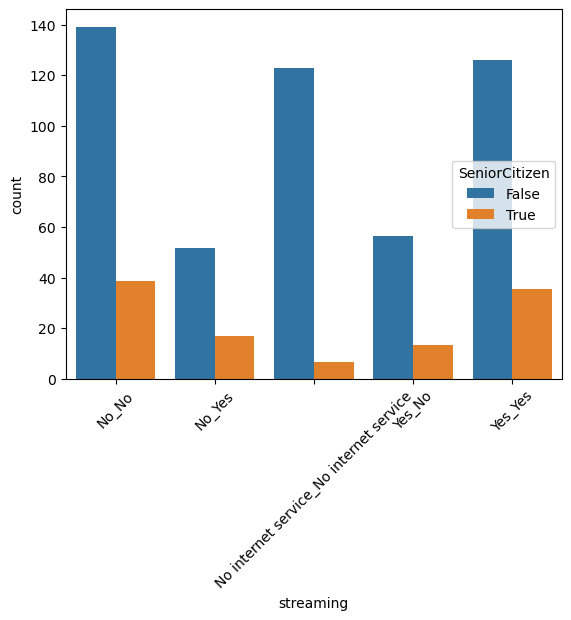

In [114]:
melted["streaming"] = melted["StreamingTV"]+"_"+melted["StreamingMovies"]
sns.barplot(data=melted, x="streaming", y="count", hue="SeniorCitizen", errorbar=('ci', False));
plt.xticks(rotation=45);

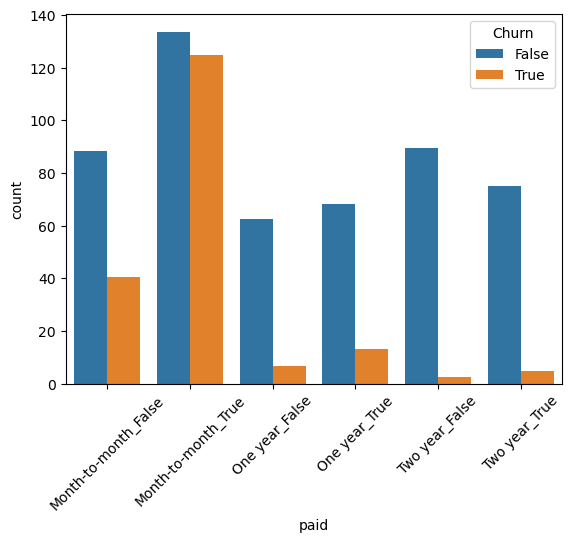

In [136]:
melted["paid"] = melted["Contract"] +"_"+ melted["PaperlessBilling"].astype(str)
sns.barplot(data=melted, x="paid", y="count", hue="Churn", errorbar=('ci', False));

plt.xticks(rotation=45);

In [139]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
7795-CFOCW,Male,False,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
9237-HQITU,Female,False,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


<Axes: >

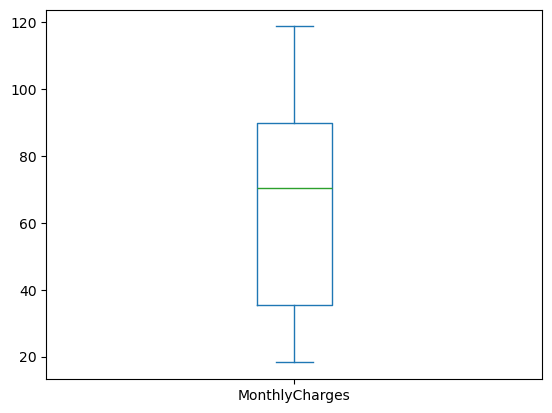

In [171]:
df["MonthlyCharges"].plot(kind="box")

In [147]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: >

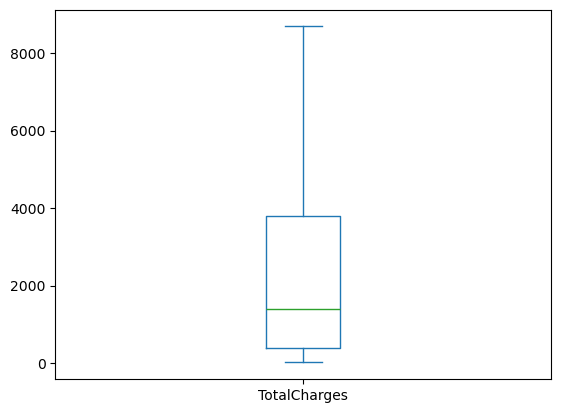

In [173]:
df["TotalCharges"].plot(kind="box")

In [175]:
df["TotalCharges"].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [177]:
df["TotalCharges"].skew()

0.9637890936414893

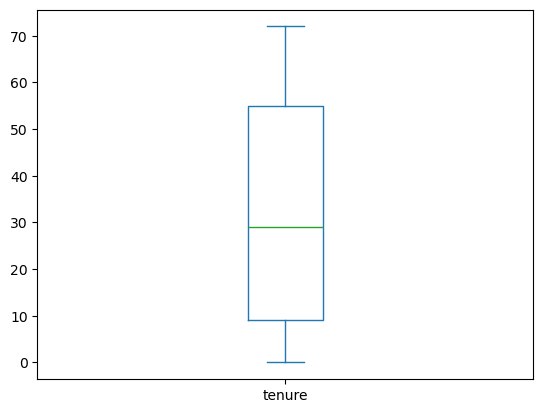

In [183]:
df["tenure"].plot(kind="box");

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   bool   
 2   Partner           7043 non-null   bool   
 3   Dependents        7043 non-null   bool   
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   bool   
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   bool   
 16  PaymentMethod     7043 non-null 

In [237]:
y = df[df.columns[-1]]
X = df[df.columns[:len(df.columns)-1]]

In [266]:
cat = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()
num = X.select_dtypes(include=["float", "int"]).columns.tolist()

In [268]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), cat),
        ("num", StandardScaler(), num)
    ]
)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [300]:
pipeline = make_pipeline(preprocess, LogisticRegression(class_weight="balanced" ))
pipeline.fit(X_train, y_train)
y_lr_pred = pipeline.predict(X_test)

In [324]:
log_params = {
    "logisticregression__C" : [0.01, 0.5, 1, 12],
    "logisticregression__solver" : ['lbfgs', 'liblinear'], 
    "logisticregression__penalty" : ['l1', 'l2', None]
}

lr_best_params = GridSearchCV(pipeline, log_params, scoring="accuracy", cv=5)
lr_best_params.fit(X_train, y_train)
print(lr_best_params.best_params_)

C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\envs\

{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}


C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-pack

In [291]:
print("Classification Report:\n", classification_report(y_test, y_lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_lr_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.72      0.81      1036
        True       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

Confusion Matrix:
 [[748 288]
 [ 65 308]]


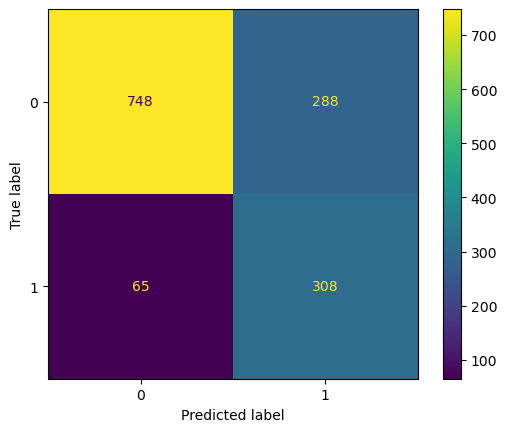

In [293]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_lr_pred)).plot()

In [350]:
pipeline2 = make_pipeline(preprocess, LogisticRegression(C=0.01, penalty = 'l2', solver='lbfgs', class_weight="balanced"))
pipeline2.fit(X_train, y_train)
y_pred_mod = pipeline2.predict(X_test)

In [352]:
print("Classification Report:\n", classification_report(y_test, y_pred_mod))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mod))

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.73      0.82      1036
        True       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

Confusion Matrix:
 [[761 275]
 [ 66 307]]


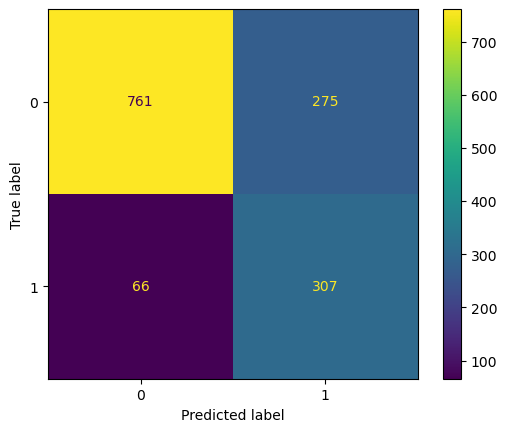

In [354]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_mod)).plot()

In [366]:
pipeline3 = make_pipeline(preprocess, RandomForestClassifier(class_weight='balanced'))
pipeline3.fit(X_train, y_train)
y_rf_pred = pipeline3.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[947  89]
 [207 166]]


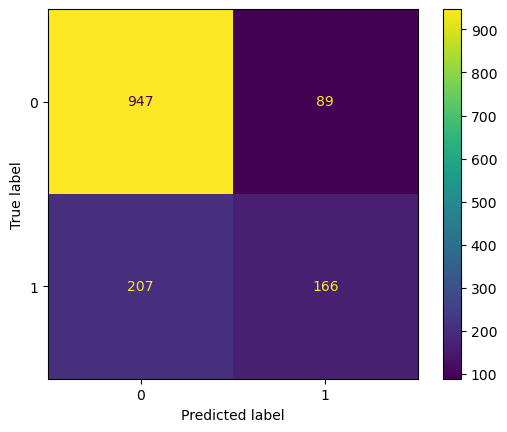

In [367]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_rf_pred)).plot()

In [374]:
import xgboost 

pipeline_xg = make_pipeline(preprocess, xgboost.XGBClassifier())
pipeline_xg.fit(X_train, y_train)
y_xg_pred = pipeline_xg.predict(X_test)

In [376]:
print("Classification Report:\n", classification_report(y_test, y_xg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_xg_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1036
        True       0.63      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[927 109]
 [190 183]]


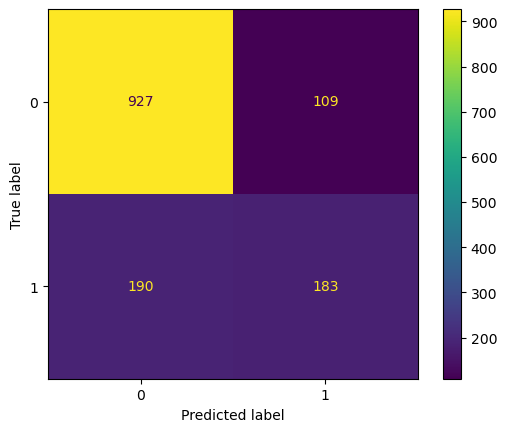

In [378]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_xg_pred)).plot()

In [386]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocess),
    ("classifier", xgb)
])

param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.7, 0.8, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 1.0],
    "classifier__scale_pos_weight": [2, 2.5, 3]  # Try len(neg)/len(pos) too
}

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring="recall",  # or 'recall' if churn recall is most important
    cv=5,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Tuned XGBoost Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:29:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuned XGBoost Report:
               precision    recall  f1-score   support

       False       0.93      0.69      0.79      1036
        True       0.50      0.86      0.63       373

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.82      0.73      0.75      1409

Confusion Matrix:
 [[715 321]
 [ 54 319]]


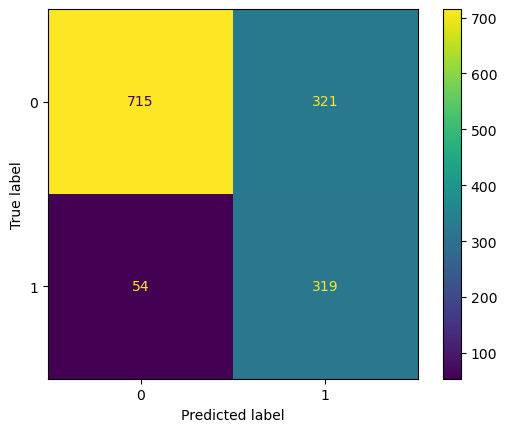

In [388]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_best)).plot()